In [3]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

WIN_LEN=700
TOTAL_SAMPLE=0
PPG_SAMPLE_RATE=125
N_FEATURES=21

def plot(wave):
    plt.plot(wave)
    plt.show()
from constants import FEATURES_DATA_DIR
import seaborn as sns

In [14]:
from sklearn import linear_model
def compute_reglin_mae(df):
    regr = linear_model.LinearRegression()
    x=df[df.columns[:-2]]
    y=df[df.columns[-2:]]
    regr.fit(x, y)
    preds=regr.predict(x)
    mae={"mae_sbp":np.mean(np.abs(preds[:,0]-y['SBP'])),"mae_dbp":np.mean(np.abs(preds[:,1]-y['DBP'])) }
    return mae


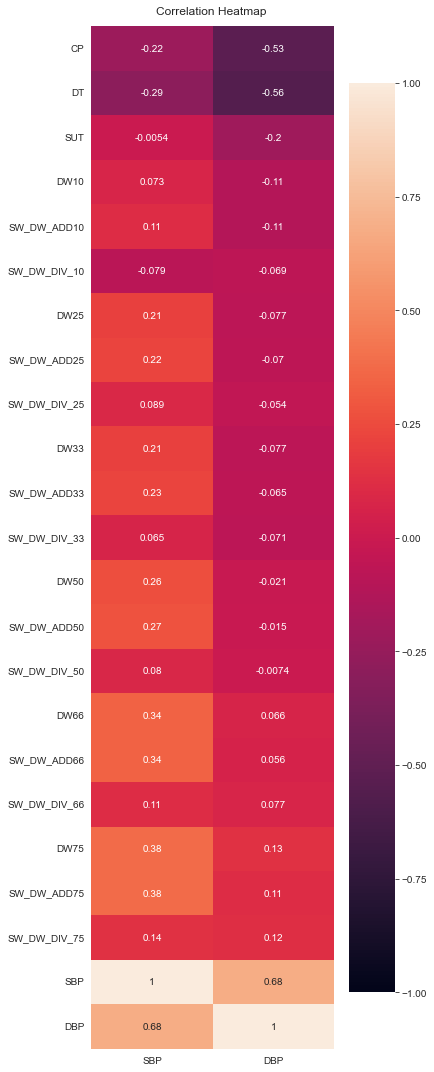

In [10]:
#CORRELATIONS
datafile=os.path.join(FEATURES_DATA_DIR,"train","all_subjects.csv")
dataframe=pd.read_csv(datafile)
df_corr=dataframe.corr()[["SBP","DBP"]]
plt.figure(figsize=(6,15))
# df_corr=df_corr[df_corr["sbp"]>0.1]
# print("Sum correlations :   (sbp:",df_corr["SBP"].sum()," dbp:",df_corr["DBP"].sum(),")")
heatmap = sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title(f'Correlation Heatmap ', fontdict={'fontsize':12}, pad=12)
plt.tight_layout()
plt.show()

In [15]:
compute_reglin_mae(df)

{'mae_sbp': 12.432139275233338, 'mae_dbp': 7.048622083437291}